<a href="https://colab.research.google.com/github/capevansdip/Titanic-Machine-learning-from-disaster/blob/master/titanic_servival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np

In [7]:
!unzip '/content/drive/My Drive/titanic.zip'


Archive:  /content/drive/My Drive/titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [8]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
submision = pd.read_csv('gender_submission.csv')

In [9]:
submision.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [10]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
train_data.shape

(891, 12)

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Survival rate in numbers: 
 0    549
1    342
Name: Survived, dtype: int64


Text(0, 0.5, 'Count')

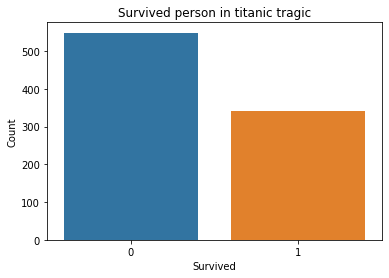

In [18]:
count = train_data['Survived'].value_counts()
print("Survival rate in numbers: \n", count)
sns.countplot(x='Survived', data = train_data)
plt.title("Survived person in titanic tragic")
plt.xlabel('Survived')
plt.ylabel('Count')

male      577
female    314
Name: Sex, dtype: int64


Text(0, 0.5, 'Count')

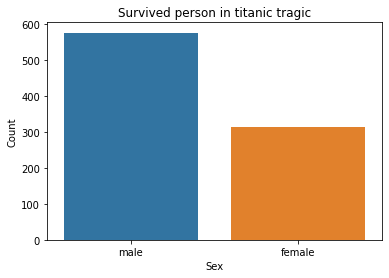

In [19]:
count = train_data['Sex'].value_counts()
print(count)
sns.countplot(x='Sex', data = train_data)
plt.title("Survived person in titanic tragic")
plt.xlabel('Sex')
plt.ylabel('Count')

Text(0.5, 1.0, 'Sex vs Survived plotting')

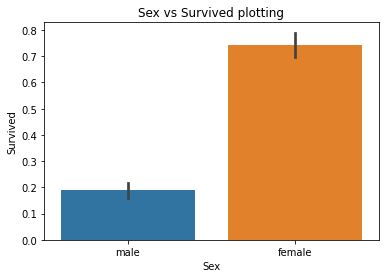

In [20]:
sns.barplot(x='Sex', y='Survived',data=train_data)
plt.title("Sex vs Survived plotting")

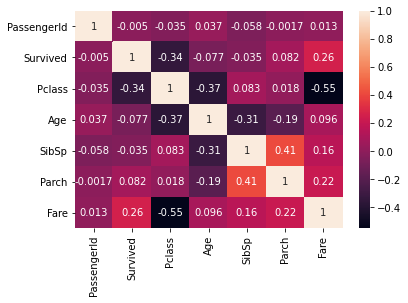

In [21]:
corr = train_data.corr(method='pearson')
sns.heatmap(corr,annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f37f0608048>,
      dtype=object)

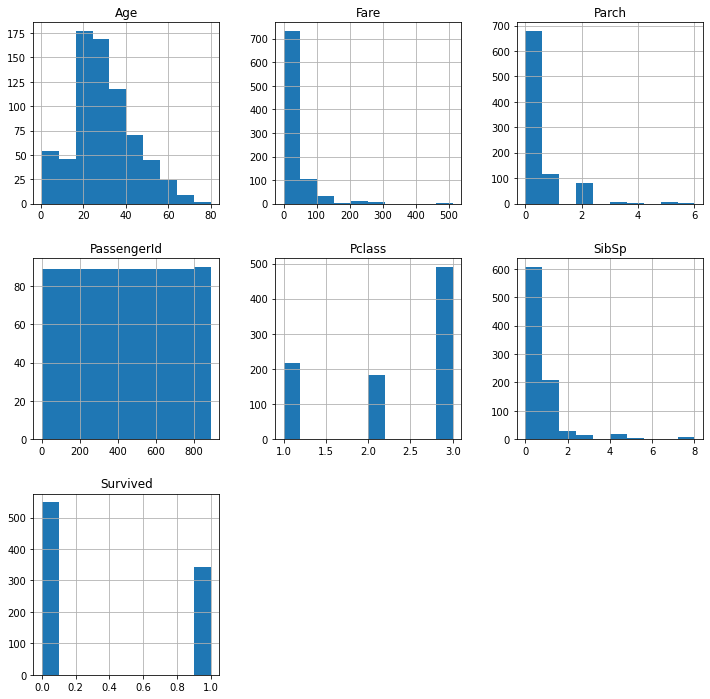

In [22]:
train_data.hist(figsize=(12,12))

In [23]:
train_df = train_data.copy()
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
train_dataset = train_data.drop(columns='Cabin')
train_dataset.head()
train_dataset.fillna(train_dataset['Age'].median(), axis=1, inplace=True)
train_dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [75]:
train_dataset.shape

(891, 11)

In [76]:
train_dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [77]:
drop_list = ['PassengerId', 'Name', 'Parch', 'Ticket']
train_df=train_dataset.drop(drop_list,axis=1)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,male,22.0,1,7.2500,S
1,1,1,female,38.0,1,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,1,53.1000,S
4,0,3,male,35.0,0,8.0500,S


In [27]:
train_df['Embarked'].value_counts()

S    554
C    130
Q     28
Name: Embarked, dtype: int64

In [110]:
train_df1 = pd.get_dummies(data=train_df, drop_first=True)
train_df1 = train_df1.drop(columns='Embarked_C', axis=1)
train_df1.head()

,Survived,Pclass,Age,SibSp,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,7.2500,1,0,1
1,1,1,38.0,1,71.2833,0,0,0
2,1,3,26.0,0,7.9250,0,0,1
3,1,1,35.0,1,53.1000,0,0,1
4,0,3,35.0,0,8.0500,1,0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f37e60ff550>,
      dtype=object)

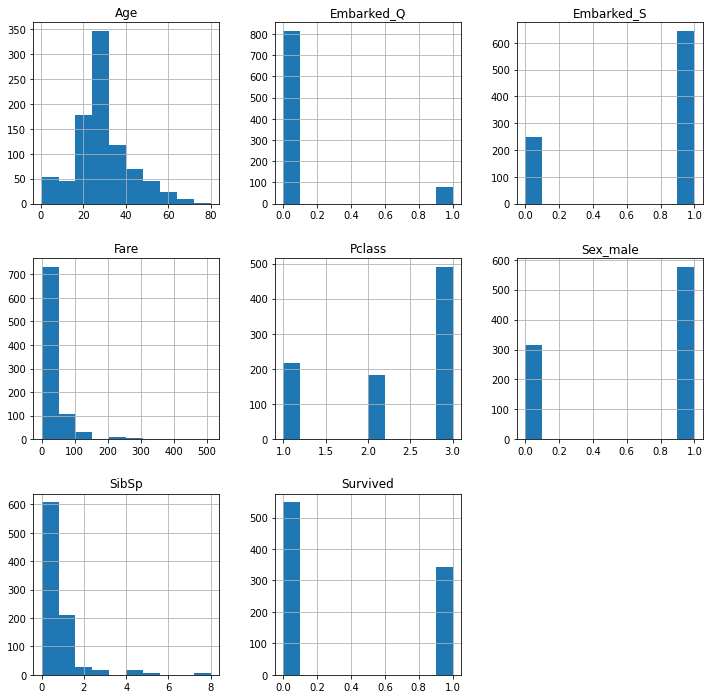

In [111]:
train_df1.hist(figsize=(12,12))

In [112]:
#model building libraries, modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#for accuray, classification_report...
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [113]:
X = train_df1.drop(columns='Survived')
y = train_df1['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train ', X_train.shape)
print('X_test ', X_test.shape)
print('y_train ', y_train.shape)
print('y_test ', y_test.shape)

X_train  (712, 7)
X_test  (179, 7)
y_train  (712,)
y_test  (179,)


In [114]:
#preprocessing the datasets
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
X_test

array([[ 0.81925059, -0.10684835, -0.46445234, ...,  0.72882288,
        -0.31426968, -1.62827579],
       [ 0.81925059, -0.10684835, -0.46445234, ...,  0.72882288,
        -0.31426968,  0.61414657],
       [ 0.81925059, -1.71005606,  3.04419557, ...,  0.72882288,
         3.18198052, -1.62827579],
       ...,
       [-1.58118735,  0.12218133,  0.41270964, ..., -1.37207547,
        -0.31426968, -1.62827579],
       [ 0.81925059, -0.48856447, -0.46445234, ...,  0.72882288,
        -0.31426968,  0.61414657],
       [ 0.81925059, -0.79393737, -0.46445234, ...,  0.72882288,
        -0.31426968,  0.61414657]])

In [115]:
def find_best_model(X, y):
  models = {
      'logsitic_Regression' : {
          'model' : LogisticRegression(solver = 'lbfgs', multi_class='auto'),
          'parameters' : {
              'C' : [1, 5, 10, 15, 20]
          }
      },
      'support_vector_classifier' : {
          'model' : SVC(gamma='auto'), 
          'parameters' : {
              'C' : [0.1, 0.5, 1, 5, 10],
              'kernel' : ['linear', 'rbf']
          }
      },
      'random_forest_classifier' : {
          'model' : RandomForestClassifier(),
          'parameters' : {
              'n_estimators':[5,10,15,20, 100,120], 
              'max_depth':[2,5]
          }
      },
      'kneighborsclassifier':{
          'model':KNeighborsClassifier(),
          'parameters':{
              'n_neighbors' : [1,5,10,20]
          }
      }
  }

  scores=[]
  cv_shuffle = ShuffleSplit(n_splits=10, test_size=0.20, random_state=0)

  for model_name, model_param in models.items():
    clf_gridsearchcv = GridSearchCV(model_param['model'], model_param['parameters'], cv=cv_shuffle, return_train_score=False)
    clf_gridsearchcv.fit(X, y)
    scores.append(
        {
            'model':model_name,
            'best_parameters' : clf_gridsearchcv.best_params_,
            'scores' : clf_gridsearchcv.best_score_
        }
    )

  return pd.DataFrame(scores, columns=['model', 'best_parameters', 'scores'])

find_best_model(X_train, y_train)

,model,best_parameters,scores
0,logsitic_Regression,{'C': 5},0.805594
1,support_vector_classifier,"{'C': 0.5, 'kernel': 'rbf'}",0.829371
2,random_forest_classifier,"{'max_depth': 5, 'n_estimators': 5}",0.828671
3,kneighborsclassifier,{'n_neighbors': 10},0.825175


In [116]:
#Random Forest Classifier giving the best scores on X_train and y_train 
#so we will move with the random_forest_classifier...



In [140]:
#using cross_val_score for gaining average score
from sklearn.model_selection import cross_val_score
score = cross_val_score(RandomForestClassifier(n_estimators = 20, max_depth = 5), X_train, y_train, cv=5)
Avg_score = sum(score)*100/len(score)
print(Avg_score)

82.72333300502314


In [122]:
clf = RandomForestClassifier(n_estimators=20, max_depth=5)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**Model Evaluation**

In [123]:
y_predicted = clf.predict(X_test)
confusion = confusion_matrix(y_test, y_predicted)
print("Confusion matrix:\n", confusion)

Confusion matrix:
 [[104   6]
 [ 23  46]]


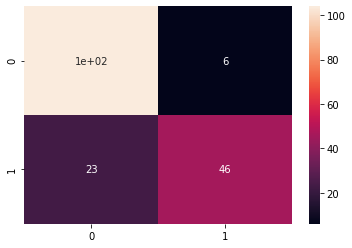

In [124]:
#plotting heatmap of confusion matrix
sns.heatmap(confusion, annot=True)

In [125]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_predicted)
print("Accuracy score: ", acc_score)

Accuracy score:  0.8379888268156425


In [126]:
classificationreport = classification_report(y_test, y_predicted)
print("classification report: \n", classificationreport)

classification report: 
               precision    recall  f1-score   support

           0       0.82      0.95      0.88       110
           1       0.88      0.67      0.76        69

    accuracy                           0.84       179
   macro avg       0.85      0.81      0.82       179
weighted avg       0.84      0.84      0.83       179



In [143]:
#using cross_val_score for gaining average score
from sklearn.model_selection import cross_val_score
score = cross_val_score(RandomForestClassifier(n_estimators = 20, max_depth = 5), X, y, cv=5)
Avg_score = sum(score)*100/len(score)
print(Avg_score)


81.14995919904588


In [145]:
clf = RandomForestClassifier(n_estimators=20, max_depth=5)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**TEST DATASET**

In [146]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [147]:
test_data.shape

(418, 11)

In [128]:
test_data['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [129]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [148]:
test_dataset = test_data.drop(columns='Cabin')
test_dataset.head()
test_dataset.fillna(test_dataset['Age'].median(), axis=1, inplace=True)
test_dataset.isnull().sum()
test_dataset.shape

drop_list = ['PassengerId', 'Name', 'Parch', 'Ticket']
test_df=test_dataset.drop(drop_list,axis=1)

test_df1 = pd.get_dummies(data=test_df, drop_first=True)
test_df1.head()

,Pclass,Age,SibSp,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,7.8292,1,1,0
1,3,47.0,1,7.0000,0,0,1
2,2,62.0,0,9.6875,1,1,0
3,3,27.0,0,8.6625,1,0,1
4,3,22.0,1,12.2875,0,0,1


**Prediction on Test Dataset**

In [149]:
prediction = clf.predict(test_df1)
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [157]:
submission = pd.DataFrame({"PassengerID" : test_data['PassengerId'],
                           "Survived" : prediction})
submission.to_csv('submission.csv', index=False)

In [156]:
sub = pd.read_csv("submission.csv")
sub.head()

,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
